# **Problem Statement**

## **Business Problem Overview**

Financial service providers are facing huge revenue and profitability crisis due to unauthorised transactions. Hence, the aim is to identify and stop the fraudulent transactions.

Our objective is to develop a machine learning model to detect fraudulent transactions based on the historical transactional data. and recommend optimal ways to mitigate the risks alongwith its cost-benefit analysis for the business.

Hence, the problem that needs to be solved here is to identify and stop the fraudulent transactions.

As a part of the analytics team, you need to develop a machine learning model to detect fraudulent transactions based on the historical transactional data. and recommend optimal ways to mitigate the risks alongwith its cost-benefit analysis for the business.


In [1]:
# Mounting google drive
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


## **Import Libraries**

In [2]:
# Importing useful libraries
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import math
from datetime import datetime, date

In [3]:
# Setting display options
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns',500)
pd.set_option('display.width', 1000)
pd.set_option('display.expand_frame_repr', False)
pd.set_option('float_format', '{:f}'.format)

## **1. Understanding Data**

In [4]:
# Reading the train and test csv data files into dataframes
df_fraudTrain = pd.read_csv('/content/gdrive/MyDrive/Capstone Project - CCFD/fraudTrain.csv')
df_fraudTest = pd.read_csv('/content/gdrive/MyDrive/Capstone Project - CCFD/fraudTest.csv')

### **Train Dataset**

In [5]:
# Displaying the dataframe
df_fraudTrain.head(2)

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,state,zip,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.970000,Jennifer,Banks,F,561 Perry Cove,Moravian Falls,NC,28654,36.078800,-81.178100,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0
1,1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.230000,Stephanie,Gill,F,43039 Riley Greens Suite 393,Orient,WA,99160,48.887800,-118.210500,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0


In [6]:
# Checking the number of rows and columns
df_fraudTrain.shape

(1296675, 23)

In [7]:
# Checking the column-wise information
df_fraudTrain.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1296675 entries, 0 to 1296674
Data columns (total 23 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   Unnamed: 0             1296675 non-null  int64  
 1   trans_date_trans_time  1296675 non-null  object 
 2   cc_num                 1296675 non-null  int64  
 3   merchant               1296675 non-null  object 
 4   category               1296675 non-null  object 
 5   amt                    1296675 non-null  float64
 6   first                  1296675 non-null  object 
 7   last                   1296675 non-null  object 
 8   gender                 1296675 non-null  object 
 9   street                 1296675 non-null  object 
 10  city                   1296675 non-null  object 
 11  state                  1296675 non-null  object 
 12  zip                    1296675 non-null  int64  
 13  lat                    1296675 non-null  float64
 14  long              

In [8]:
# Checking the summary for the numeric columns
df_fraudTrain.describe()

,Unnamed: 0,cc_num,amt,zip,lat,long,city_pop,unix_time,merch_lat,merch_long,is_fraud
count,1296675.000000,1296675.000000,1296675.000000,1296675.000000,1296675.000000,1296675.000000,1296675.000000,1296675.000000,1296675.000000,1296675.000000,1296675.000000
mean,648337.000000,417192042079641088.000000,70.351035,48800.671097,38.537622,-90.226335,88824.440563,1349243636.726123,38.537338,-90.226465,0.005789
std,374317.974488,1308806447000789248.000000,160.316039,26893.222476,5.075808,13.759077,301956.360689,12841278.423360,5.109788,13.771091,0.075863
min,0.000000,60416207185.000000,1.000000,1257.000000,20.027100,-165.672300,23.000000,1325376018.000000,19.027785,-166.671242,0.000000
25%,324168.500000,180042946491150.000000,9.650000,26237.000000,34.620500,-96.798000,743.000000,1338750742.500000,34.733572,-96.897276,0.000000
50%,648337.000000,3521417320836166.000000,47.520000,48174.000000,39.354300,-87.476900,2456.000000,1349249747.000000,39.365680,-87.438392,0.000000
75%,972505.500000,4642255475285942.000000,83.140000,72042.000000,41.940400,-80.158000,20328.000000,1359385375.500000,41.957164,-80.236797,0.000000
max,1296674.000000,4992346398065154048.000000,28948.900000,99783.000000,66.693300,-67.950300,2906700.000000,1371816817.000000,67.510267,-66.950902,1.000000


### **Test Dataset**

In [9]:
# Displaying the dataframe
df_fraudTest.head(2)

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,state,zip,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2020-06-21 12:14:25,2291163933867244,fraud_Kirlin and Sons,personal_care,2.860000,Jeff,Elliott,M,351 Darlene Green,Columbia,SC,29209,33.965900,-80.935500,333497,Mechanical engineer,1968-03-19,2da90c7d74bd46a0caf3777415b3ebd3,1371816865,33.986391,-81.200714,0
1,1,2020-06-21 12:14:33,3573030041201292,fraud_Sporer-Keebler,personal_care,29.840000,Joanne,Williams,F,3638 Marsh Union,Altonah,UT,84002,40.320700,-110.436000,302,"Sales professional, IT",1990-01-17,324cc204407e99f51b0d6ca0055005e7,1371816873,39.450498,-109.960431,0


In [10]:
# Checking the number of rows and columns
df_fraudTest.shape

(555719, 23)

In [11]:
# Checking the column-wise information
df_fraudTest.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 555719 entries, 0 to 555718
Data columns (total 23 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   Unnamed: 0             555719 non-null  int64  
 1   trans_date_trans_time  555719 non-null  object 
 2   cc_num                 555719 non-null  int64  
 3   merchant               555719 non-null  object 
 4   category               555719 non-null  object 
 5   amt                    555719 non-null  float64
 6   first                  555719 non-null  object 
 7   last                   555719 non-null  object 
 8   gender                 555719 non-null  object 
 9   street                 555719 non-null  object 
 10  city                   555719 non-null  object 
 11  state                  555719 non-null  object 
 12  zip                    555719 non-null  int64  
 13  lat                    555719 non-null  float64
 14  long                   555719 non-nu

In [12]:
# Checking the summary for the numeric columns
df_fraudTest.describe()

,Unnamed: 0,cc_num,amt,zip,lat,long,city_pop,unix_time,merch_lat,merch_long,is_fraud
count,555719.000000,555719.000000,555719.000000,555719.000000,555719.000000,555719.000000,555719.000000,555719.000000,555719.000000,555719.000000,555719.000000
mean,277859.000000,417838695528750528.000000,69.392810,48842.628015,38.543253,-90.231325,88221.887918,1380678865.166780,38.542798,-90.231380,0.003860
std,160422.401459,1309836622980698624.000000,156.745941,26855.283328,5.061336,13.721780,300390.892061,5201104.065916,5.095829,13.733071,0.062008
min,0.000000,60416207185.000000,1.000000,1257.000000,20.027100,-165.672300,23.000000,1371816865.000000,19.027422,-166.671575,0.000000
25%,138929.500000,180042946491150.000000,9.630000,26292.000000,34.668900,-96.798000,741.000000,1376028627.500000,34.755302,-96.905129,0.000000
50%,277859.000000,3521417320836166.000000,47.290000,48174.000000,39.371600,-87.476900,2408.000000,1380761988.000000,39.376593,-87.445204,0.000000
75%,416788.500000,4635330563105903.000000,83.010000,72011.000000,41.894800,-80.175200,19685.000000,1385866984.000000,41.954163,-80.264637,0.000000
max,555718.000000,4992346398065154048.000000,22768.110000,99921.000000,65.689900,-67.950300,2906700.000000,1388534374.000000,66.679297,-66.952026,1.000000


#### *Note: The Train dataset is being used to conduct the analysis, modelling and model validation.*

In [13]:
# Creating a copy of df_fraudTrain for further analysis
df1 = df_fraudTrain.copy()

In [14]:
# Checking columns with unique values 
df1.nunique()

Unnamed: 0               1296675
trans_date_trans_time    1274791
cc_num                       983
merchant                     693
category                      14
amt                        52928
first                        352
last                         481
gender                         2
street                       983
city                         894
state                         51
zip                          970
lat                          968
long                         969
city_pop                     879
job                          494
dob                          968
trans_num                1296675
unix_time                1274823
merch_lat                1247805
merch_long               1275745
is_fraud                       2
dtype: int64

In [15]:
# Checking null values
df1.isnull().sum()

Unnamed: 0               0
trans_date_trans_time    0
cc_num                   0
merchant                 0
category                 0
amt                      0
first                    0
last                     0
gender                   0
street                   0
city                     0
state                    0
zip                      0
lat                      0
long                     0
city_pop                 0
job                      0
dob                      0
trans_num                0
unix_time                0
merch_lat                0
merch_long               0
is_fraud                 0
dtype: int64

In [16]:
# Distribution of fraud transactions
df1_fraud=df1[['is_fraud','trans_date_trans_time']].groupby('is_fraud').count().reset_index()
df1_fraud.columns=['is_fraud','count']
df1_fraud['percentage']=(round(df1['is_fraud'].value_counts(normalize=True)*100,2))
df1_fraud

,is_fraud,count,percentage
0,0,1289169,99.420000
1,1,7506,0.580000


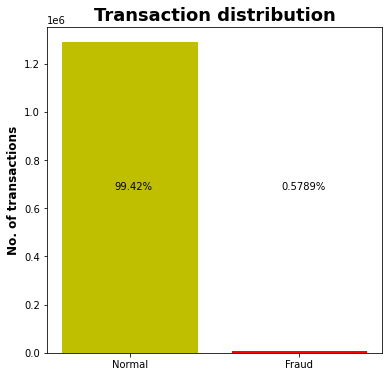

In [17]:
# Plotting distribution of fraud transactions
classes=df1['is_fraud'].value_counts()
normal_share=classes[0]/df1['is_fraud'].count()*100
fraud_share=classes[1]/df1['is_fraud'].count()*100

plt.figure(figsize=(6,6))
plt.bar(['Normal','Fraud'], classes, color=['y','r'])
plt.ylabel('No. of transactions',fontweight='bold', size=12)
plt.annotate("{0:.4}%".format(normal_share),(0.2, 0.5), xycoords='axes fraction')
plt.annotate("{0:.4}%".format(fraud_share),(0.7, 0.5), xycoords='axes fraction')
plt.title('Transaction distribution',fontweight='bold', size=18)
plt.show()

**Observation:**
- The dataset is highly imbalanced. This needs to be handled using class imbalance technique.

In [18]:
# Converting datatype to datetime
df1['trans_date_trans_time'] = pd.to_datetime(df1['trans_date_trans_time'])
df1['dob'] = pd.to_datetime(df1['dob'])

In [19]:
# Deriving hour of transaction (trx_hour) 
df1['trx_hour'] = df1['trans_date_trans_time'].dt.hour

# Deriving day of transaction (trx_day) 
df1['trx_day'] = df1['trans_date_trans_time'].dt.day_name()

# Deriving year & month of transaction (trx_period) 
df1['trx_period'] = df1['trans_date_trans_time'].dt.to_period('M')

# Deriving age of customer during transaction 
df1['age'] = (np.round((df1['trans_date_trans_time'] - df1['dob'])/np.timedelta64(1,'Y')))

In [20]:
# Checking distribution of age
round(df1['age'].describe(),2)

count   1296675.000000
mean         46.000000
std          17.400000
min          14.000000
25%          33.000000
50%          44.000000
75%          57.000000
max          96.000000
Name: age, dtype: float64

**Observation:**
- About 50% of the transactions are done by people in the age group of 33 to 57 years.

In [21]:
# Checking distribution of city_pop
round(df1.city_pop.describe(),2)

count   1296675.000000
mean      88824.440000
std      301956.360000
min          23.000000
25%         743.000000
50%        2456.000000
75%       20328.000000
max     2906700.000000
Name: city_pop, dtype: float64

In [22]:
# Creating a column to identify the region type based on city population [<25%: rural, 25-50%: semi-urban, >50%: urban]
df1['region'] = pd.qcut(df1.city_pop, q=[0, .25, .75, 1], labels=['rural', 'semi-urban', 'urban'])

In [23]:
# Checking distribution across region
df1['region'].value_counts()

semi-urban    645705
rural         327537
urban         323433
Name: region, dtype: int64

**Observation:**
- Maximum transactions are done by people from the semi-urban region.

In [24]:
# Function to calculate the distance between two address
def fn_dist(lon1, lat1, lon2, lat2):

    lon1, lat1, lon2, lat2 = map(np.radians, [lon1, lat1, lon2, lat2])

    r_lon = lon2 - lon1
    r_lat = lat2 - lat1

    haver_formula = np.sin(r_lat/2.0)**2 + np.cos(lat1) * np.cos(lat2) * np.sin(r_lon/2.0)**2

    dist = 2 * np.arcsin(np.sqrt(haver_formula))
    km = 6367 * dist #6367 for distance in KM
    return km

In [25]:
# Creating the distance column
df1['distance'] = fn_dist(df1['long'],df1['lat'],df1['merch_long'],df1['merch_lat'])

In [26]:
# Checking the updated dataframe information
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1296675 entries, 0 to 1296674
Data columns (total 29 columns):
 #   Column                 Non-Null Count    Dtype         
---  ------                 --------------    -----         
 0   Unnamed: 0             1296675 non-null  int64         
 1   trans_date_trans_time  1296675 non-null  datetime64[ns]
 2   cc_num                 1296675 non-null  int64         
 3   merchant               1296675 non-null  object        
 4   category               1296675 non-null  object        
 5   amt                    1296675 non-null  float64       
 6   first                  1296675 non-null  object        
 7   last                   1296675 non-null  object        
 8   gender                 1296675 non-null  object        
 9   street                 1296675 non-null  object        
 10  city                   1296675 non-null  object        
 11  state                  1296675 non-null  object        
 12  zip                    12966

## **2. Exploratory Data Analysis (EDA)**

In [27]:
# Creating separate dataframes for fraud and not-fraud transactions
df1_yes = df1[df1['is_fraud'] == 1]
df1_no = df1[df1['is_fraud'] == 0]

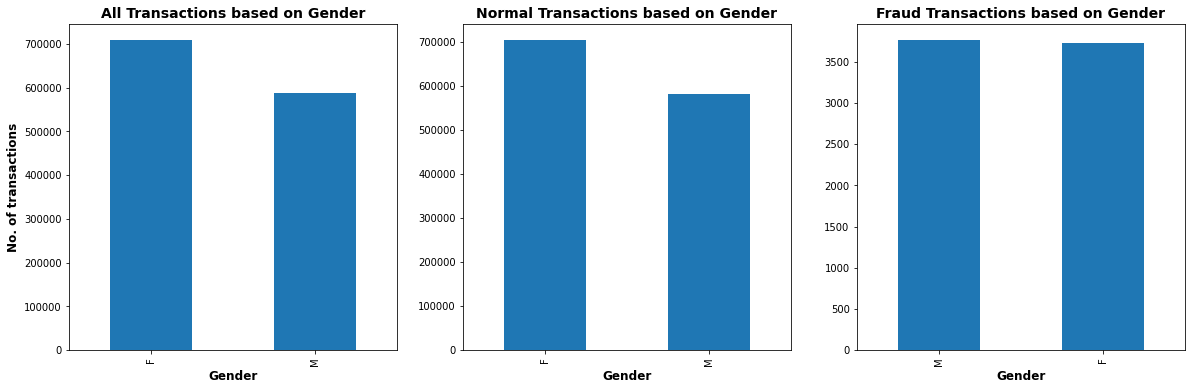

In [28]:
# Plotting distribution of trasactions based on Gender
plt.figure(figsize=(20,6))
plt.subplot(1, 3, 1)
df1['gender'].value_counts().plot.bar();
plt.title('All Transactions based on Gender',fontweight='bold', size=14)
plt.xlabel('Gender',fontweight='bold', size=12)
plt.ylabel('No. of transactions',fontweight='bold', size=12)
plt.subplot(1, 3, 2)
df1_no['gender'].value_counts().plot.bar();
plt.title('Normal Transactions based on Gender',fontweight='bold', size=14)
plt.xlabel('Gender',fontweight='bold', size=12)
plt.subplot(1, 3, 3)
df1_yes['gender'].value_counts().plot.bar();
plt.title('Fraud Transactions based on Gender',fontweight='bold', size=14)
plt.xlabel('Gender',fontweight='bold', size=12)
plt.show()

**Observation:**
- Overall relatively more credit card transactions are done by females than males.
- Almost same number of fraudulent transactions are observed for both the genders.

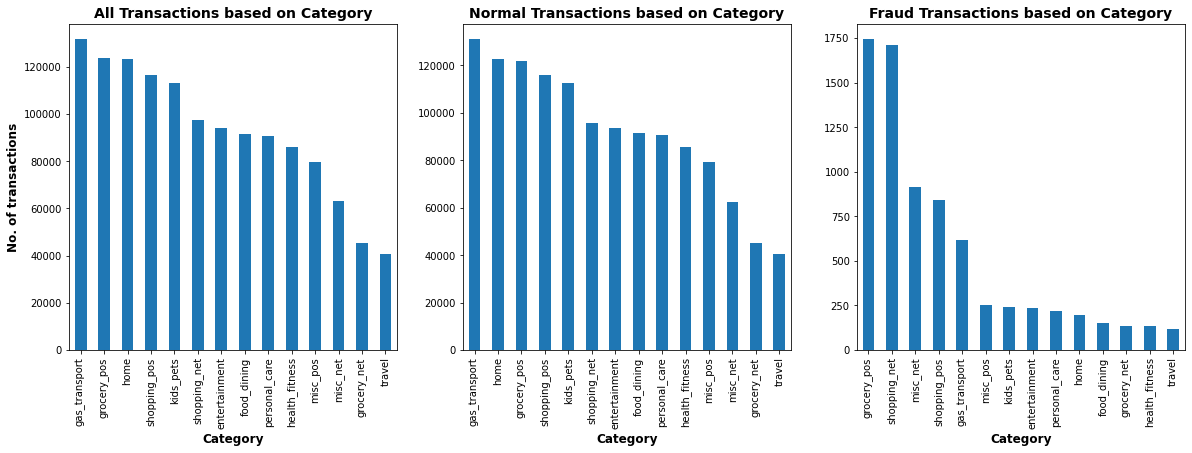

In [29]:
# Plotting distribution of transactions across categories
plt.figure(figsize=(20,6))
plt.subplot(1, 3, 1)
df1['category'].value_counts().plot.bar();
plt.title('All Transactions based on Category',fontweight='bold', size=14)
plt.xlabel('Category',fontweight='bold', size=12)
plt.ylabel('No. of transactions',fontweight='bold', size=12)
plt.subplot(1, 3, 2)
df1_no['category'].value_counts().plot.bar();
plt.title('Normal Transactions based on Category',fontweight='bold', size=14)
plt.xlabel('Category',fontweight='bold', size=12)
plt.subplot(1, 3, 3)
df1_yes['category'].value_counts().plot.bar();
plt.title('Fraud Transactions based on Category',fontweight='bold', size=14)
plt.xlabel('Category',fontweight='bold', size=12)
plt.show()

**Observation:**
- Overall highest number of transactions are in the gas_transport category and lowest number of transactions are in the travel category.
- Most fraudulent transactions are in the grocery_pos category.

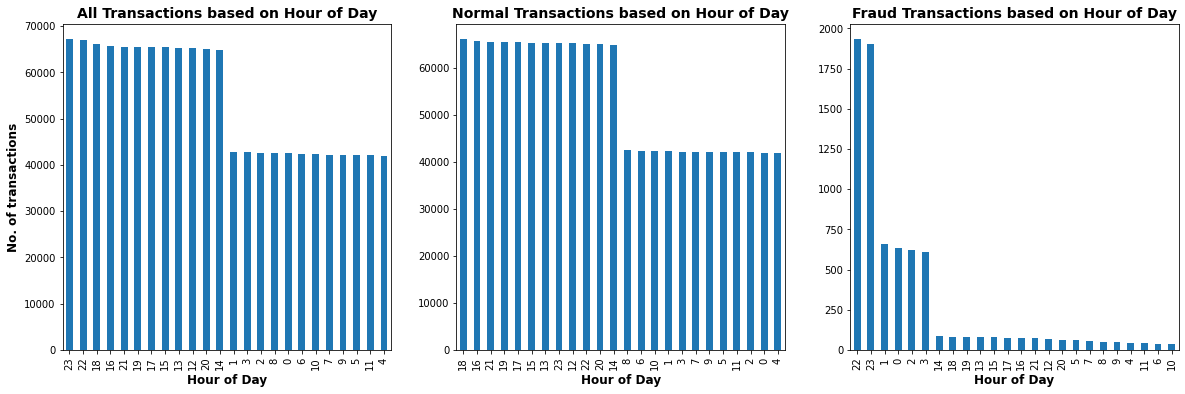

In [30]:
# Plotting distribution of trasactions on hour of day
plt.figure(figsize=(20,6))
plt.subplot(1, 3, 1)
df1['trx_hour'].value_counts().plot.bar();
plt.title('All Transactions based on Hour of Day',fontweight='bold', size=14)
plt.xlabel('Hour of Day',fontweight='bold', size=12)
plt.ylabel('No. of transactions',fontweight='bold', size=12)
plt.subplot(1, 3, 2)
df1_no['trx_hour'].value_counts().plot.bar();
plt.title('Normal Transactions based on Hour of Day',fontweight='bold', size=14)
plt.xlabel('Hour of Day',fontweight='bold', size=12)
plt.subplot(1, 3, 3)
df1_yes['trx_hour'].value_counts().plot.bar();
plt.title('Fraud Transactions based on Hour of Day',fontweight='bold', size=14)
plt.xlabel('Hour of Day',fontweight='bold', size=12)
plt.show()

**Observation:**
- Most of the credit card transactions are observed after noon (12pm).
- Most fraudulent transactions are observed at late night hours (10pm-3am).

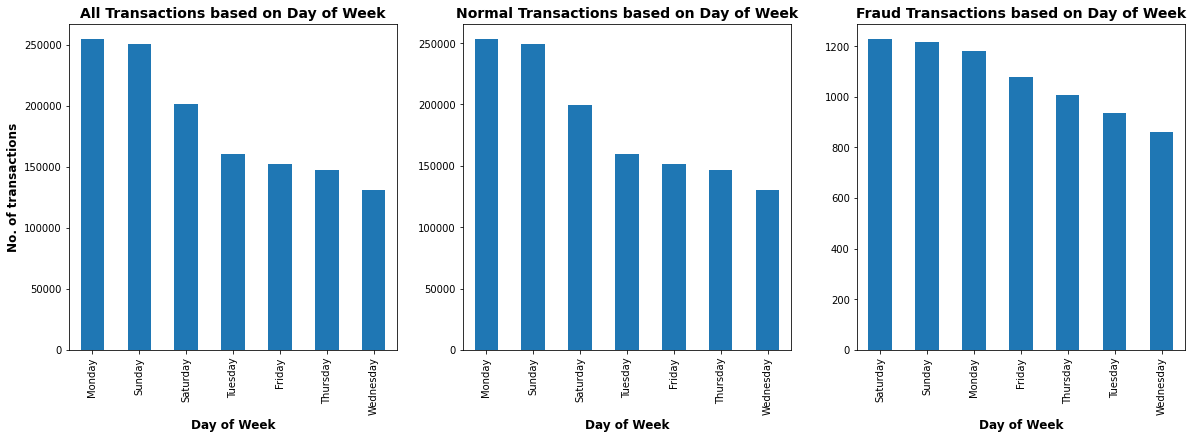

In [31]:
# Plotting distribution of trasactions on day of week
plt.figure(figsize=(20,6))
plt.subplot(1, 3, 1)
df1['trx_day'].value_counts().plot.bar();
plt.title('All Transactions based on Day of Week',fontweight='bold', size=14)
plt.xlabel('Day of Week',fontweight='bold', size=12)
plt.ylabel('No. of transactions',fontweight='bold', size=12)
plt.subplot(1, 3, 2)
df1_no['trx_day'].value_counts().plot.bar();
plt.title('Normal Transactions based on Day of Week',fontweight='bold', size=14)
plt.xlabel('Day of Week',fontweight='bold', size=12)
plt.subplot(1, 3, 3)
df1_yes['trx_day'].value_counts().plot.bar();
plt.title('Fraud Transactions based on Day of Week',fontweight='bold', size=14)
plt.xlabel('Day of Week',fontweight='bold', size=12)
plt.show()

**Observation:**
- Most of the credit card transactions are observed on Mondays and Sundays.
- Most fraudulent transactions are observed on the weekends, i.e., Saturdays and Sundays.

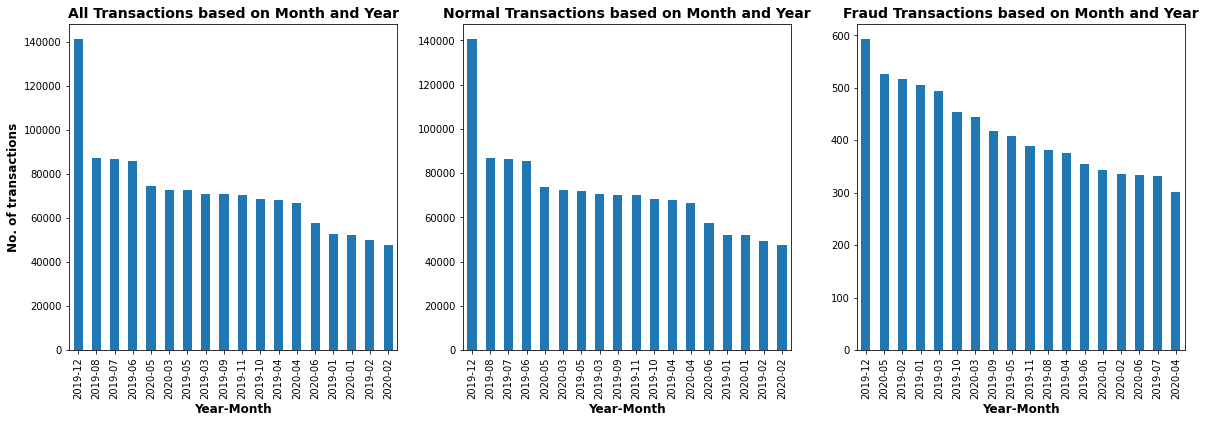

In [32]:
# Plotting distribution of monthwise yearly transactions
plt.figure(figsize=(20,6))
plt.subplot(1, 3, 1)
df1['trx_period'].value_counts().plot.bar();
plt.title('All Transactions based on Month and Year',fontweight='bold', size=14)
plt.xlabel('Year-Month',fontweight='bold', size=12)
plt.ylabel('No. of transactions',fontweight='bold', size=12)
plt.subplot(1, 3, 2)
df1_no['trx_period'].value_counts().plot.bar();
plt.title('Normal Transactions based on Month and Year',fontweight='bold', size=14)
plt.xlabel('Year-Month',fontweight='bold', size=12)
plt.subplot(1, 3, 3)
df1_yes['trx_period'].value_counts().plot.bar();
plt.title('Fraud Transactions based on Month and Year',fontweight='bold', size=14)
plt.xlabel('Year-Month',fontweight='bold', size=12)
plt.show()

**Observation:**
- Most credit card transactions are observed for December and least for February.
- Highest number of fraudulent transactions are observed in December.

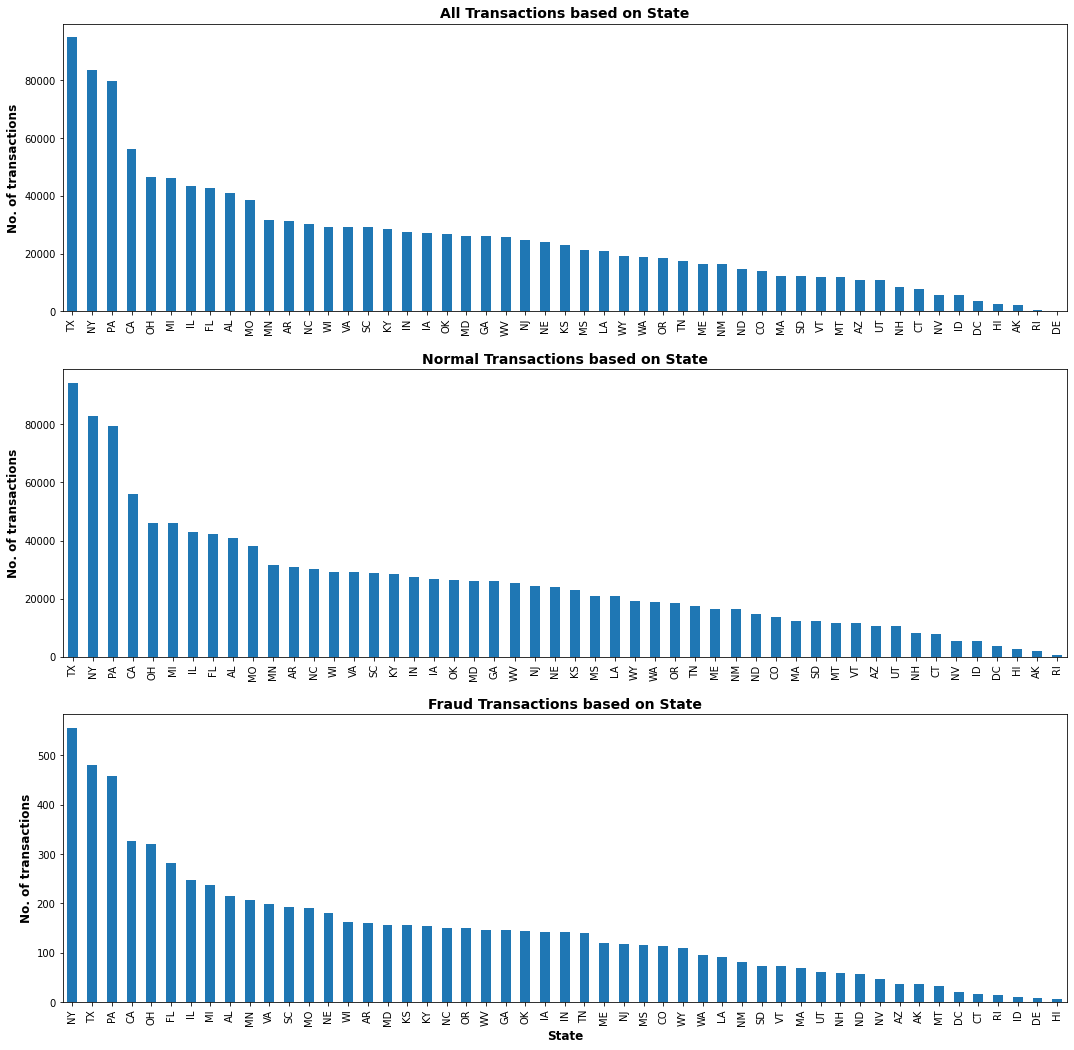

In [33]:
# Plotting distribution of transactions across State
plt.figure(figsize=(18,18))
plt.subplot(3, 1, 1)
df1['state'].value_counts().plot.bar();
plt.title('All Transactions based on State',fontweight='bold', size=14)
plt.ylabel('No. of transactions',fontweight='bold', size=12)
plt.subplot(3, 1, 2)
df1_no['state'].value_counts().plot.bar();
plt.title('Normal Transactions based on State',fontweight='bold', size=14)
plt.ylabel('No. of transactions',fontweight='bold', size=12)
plt.subplot(3, 1, 3)
df1_yes['state'].value_counts().plot.bar();
plt.title('Fraud Transactions based on State',fontweight='bold', size=14)
plt.ylabel('No. of transactions',fontweight='bold', size=12)
plt.xlabel('State',fontweight='bold', size=12)
plt.show()

**Observation:**
- Most credit card transactions are observed in TX, NY, PA.
- Most fraudulent transactions are observed in NY.

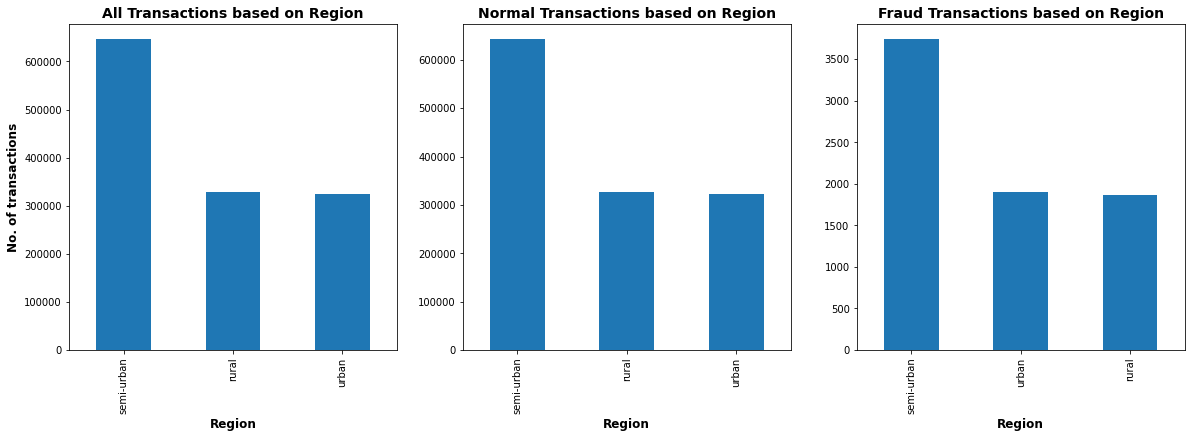

In [34]:
# Plotting distribution of trasactions based on region
plt.figure(figsize=(20,6))
plt.subplot(1, 3, 1)
df1['region'].value_counts().plot.bar();
plt.title('All Transactions based on Region',fontweight='bold', size=14)
plt.xlabel('Region',fontweight='bold', size=12)
plt.ylabel('No. of transactions',fontweight='bold', size=12)
plt.subplot(1, 3, 2)
df1_no['region'].value_counts().plot.bar();
plt.title('Normal Transactions based on Region',fontweight='bold', size=14)
plt.xlabel('Region',fontweight='bold', size=12)
plt.subplot(1, 3, 3)
df1_yes['region'].value_counts().plot.bar();
plt.title('Fraud Transactions based on Region',fontweight='bold', size=14)
plt.xlabel('Region',fontweight='bold', size=12)
plt.show()

**Observation:**
- Maximum transactions are done by people from the semi-urban region.
- Fraudulent transactions are relatively much higher in semi-urban regions as compared to urban or rural regions.

In [35]:
# Distribution of transactions based on Job
df1_job = pd.concat([df1['job'].value_counts().reset_index().rename(columns={'index': 'Job', 'job':'All trx'}),
                     df1_no['job'].value_counts().reset_index(drop = 1).rename("Normal trx"),
                     df1_yes['job'].value_counts().reset_index(drop = 1).rename("Fraud trx")]
                    ,axis=1)

df1_job['Normal Percent'] = round((df1_job['Normal trx']/df1_job['All trx'])*100,2)
df1_job['Fraud Percent'] = round((df1_job['Fraud trx']/df1_job['All trx'])*100,2)

df1_job.sort_values(by='All trx',ascending=False).head(10)

,Job,All trx,Normal trx,Fraud trx,Normal Percent,Fraud Percent
0,Film/video editor,9779,9735.000000,62.000000,99.550000,0.630000
1,Exhibition designer,9199,9148.000000,56.000000,99.450000,0.610000
2,Naval architect,8684,8631.000000,53.000000,99.390000,0.610000
3,"Surveyor, land/geomatics",8680,8630.000000,51.000000,99.420000,0.590000
4,Materials engineer,8270,8213.000000,50.000000,99.310000,0.600000
5,"Designer, ceramics/pottery",8225,8208.000000,49.000000,99.790000,0.600000
6,Systems developer,7700,7687.000000,48.000000,99.830000,0.620000
7,IT trainer,7679,7650.000000,48.000000,99.620000,0.630000
8,Financial adviser,7659,7636.000000,46.000000,99.700000,0.600000
9,Environmental consultant,7547,7525.000000,45.000000,99.710000,0.600000


**Observation:**
- Most credit card transaction are observed for jobs: Film/video editor and Exhibition designer.
- No significant conclusion can be drawn for fraudulent transactions based on the 'job' column as all values lie within same range.

In [36]:
# Distribution of transactions based on Merchant
df1_merch = pd.concat([df1['merchant'].value_counts().reset_index().rename(columns={'index': 'Merchant', 'merchant':'All trx'}),
                     df1_no['merchant'].value_counts().reset_index(drop = 1).rename("Normal trx"),
                     df1_yes['merchant'].value_counts().reset_index(drop = 1).rename("Fraud trx")]
                    ,axis=1)

df1_merch['Normal Percent'] = round((df1_merch['Normal trx']/df1_merch['All trx'])*100,2)
df1_merch['Fraud Percent'] = round((df1_merch['Fraud trx']/df1_merch['All trx'])*100,2)

df1_merch.sort_values(by='Fraud Percent',ascending=False).head(10)

,Merchant,All trx,Normal trx,Fraud trx,Normal Percent,Fraud Percent
6,fraud_Cummerata-Jones,2736,2724,44.000000,99.560000,1.610000
7,fraud_Kutch LLC,2734,2719,44.000000,99.450000,1.610000
8,"fraud_Olson, Becker and Koch",2723,2712,43.000000,99.600000,1.580000
11,"fraud_Jenkins, Hauck and Friesen",2705,2691,42.000000,99.480000,1.550000
10,fraud_Rodriguez Group,2716,2705,42.000000,99.590000,1.550000
9,"fraud_Stroman, Hudson and Erdman",2721,2711,42.000000,99.630000,1.540000
15,fraud_Friesen-Stamm,2680,2668,41.000000,99.550000,1.530000
14,"fraud_Connelly, Reichert and Fritsch",2684,2672,41.000000,99.550000,1.530000
13,fraud_Kling Inc,2687,2677,41.000000,99.630000,1.530000
12,fraud_Erdman-Kertzmann,2705,2690,41.000000,99.450000,1.520000


**Observation:**
- No significant conclusion can be drawn from the 'merchant' column as all values lie within same range.

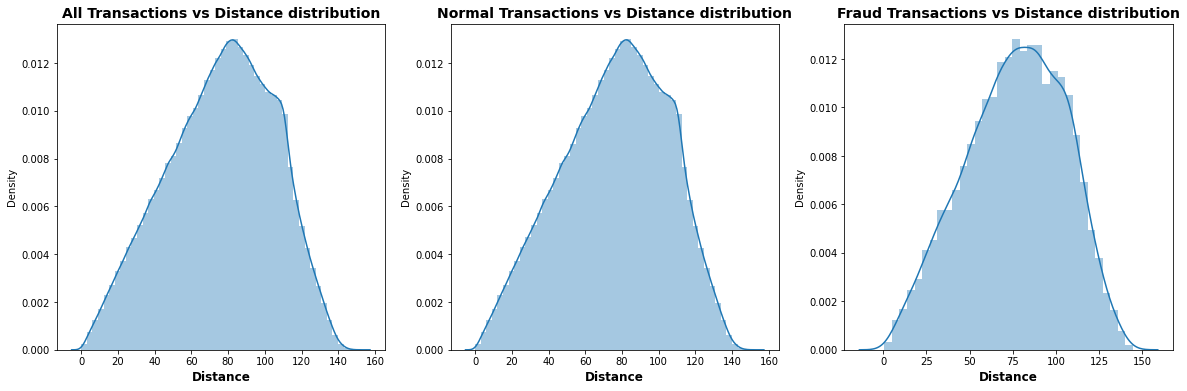

In [37]:
# Plotting distribution of trasactions vs distance
fig, ax = plt.subplots(1,3,figsize=(20,6))
sns.distplot(df1['distance'], ax= ax[0])
sns.distplot(df1_no['distance'], ax= ax[1]) 
sns.distplot(df1_yes['distance'], ax= ax[2]) 

ax[0].set_title('All Transactions vs Distance distribution',fontweight='bold', size=14)
ax[1].set_title('Normal Transactions vs Distance distribution',fontweight='bold', size=14)
ax[2].set_title('Fraud Transactions vs Distance distribution',fontweight='bold', size=14)

ax[0].set_xlabel('Distance',fontweight='bold', size=12)
ax[1].set_xlabel('Distance',fontweight='bold', size=12)
ax[2].set_xlabel('Distance',fontweight='bold', size=12)

plt.show()

**Observation:**
- The transactions are almost normally distributed across all distances.

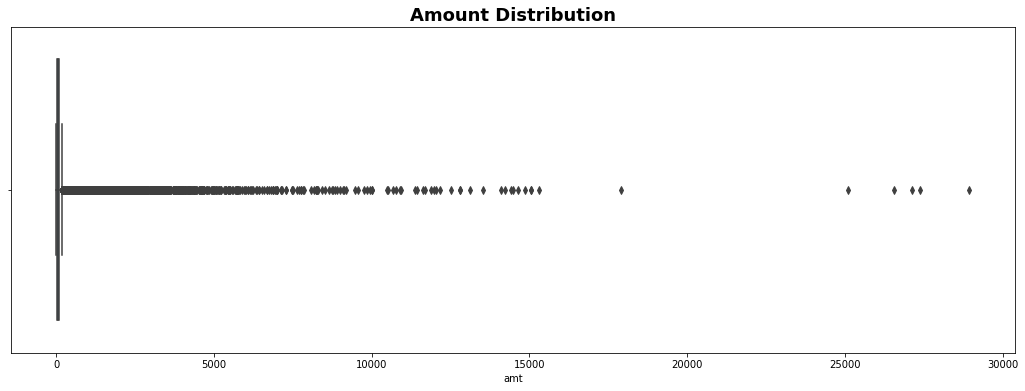

In [38]:
# Plotting distribution of amt
plt.figure(figsize=(18,6))
sns.boxplot(df1['amt'])
plt.title('Amount Distribution',fontweight='bold', size=18)
plt.show()

In [39]:
# Distribution of transaction amount for fraud and normal transactions
pd.concat([round(df1['amt'].describe(percentiles = [0.5,0.95,0.99]),2).reset_index().rename(columns={'index': 'Statistic', 'amt':'All trx'}),
           round(df1.loc[df1['is_fraud']==0,['amt']].describe(percentiles = [0.5,0.95,0.99]),2).reset_index(drop = 1).rename(columns={'amt':'Normal trx'}),
           round(df1.loc[df1['is_fraud']==1,['amt']].describe(percentiles = [0.5,0.95,0.99]),2).reset_index(drop = 1).rename(columns={'amt':'Fraud trx'})],
          axis=1)

,Statistic,All trx,Normal trx,Fraud trx
0,count,1296675.000000,1289169.000000,7506.000000
1,mean,70.350000,67.670000,531.320000
2,std,160.320000,154.010000,390.560000
3,min,1.000000,1.000000,1.060000
4,50%,47.520000,47.280000,396.500000
5,95%,196.310000,189.900000,1083.990000
6,99%,545.990000,486.300000,1179.690000
7,max,28948.900000,28948.900000,1376.040000


**Observation:**
- Average amount in fraud transactions is higher than that in regular transactions:
 - Average Amount in Fraud transaction: 531.32
 - Average Amount in Regular transaction: 67.67

- Fraud transactions are observed for amount below 1500.

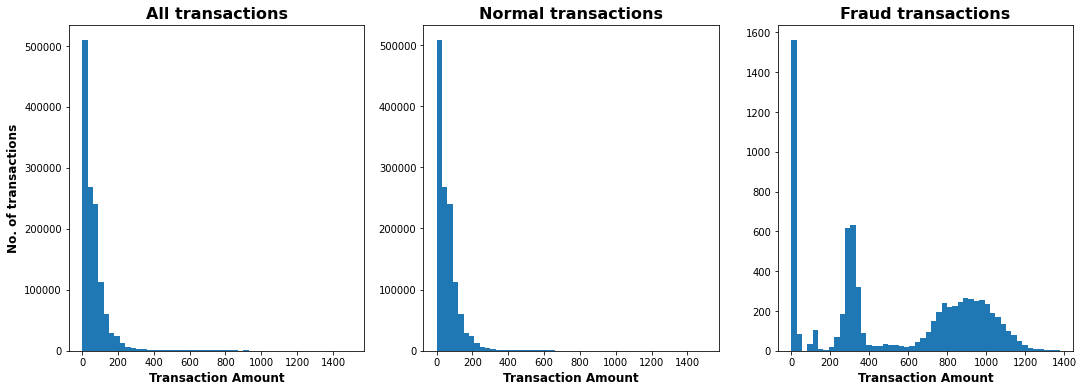

In [40]:
# Plotting distribution for transaction amount less than 1500
fig, ax = plt.subplots(1,3,figsize=(18,6))

ax[0].hist(df1[df1['amt']<=1500]['amt'],bins=50)
ax[1].hist(df1_no[df1_no['amt']<=1500]['amt'],bins=50)
ax[2].hist(df1_yes[df1_yes['amt']<=1500]['amt'],bins=50)

ax[0].set_title('All transactions',fontweight='bold', size=16)
ax[1].set_title('Normal transactions',fontweight='bold', size=16)
ax[2].set_title('Fraud transactions',fontweight='bold', size=16)

ax[0].set_ylabel('No. of transactions',fontweight='bold', size=12)

ax[0].set_xlabel('Transaction Amount',fontweight='bold', size=12)
ax[1].set_xlabel('Transaction Amount',fontweight='bold', size=12)
ax[2].set_xlabel('Transaction Amount',fontweight='bold', size=12)

plt.show()

**Observation:**
- Most transactions are for smaller amounts, indicating positive or right skewness in the distribution.

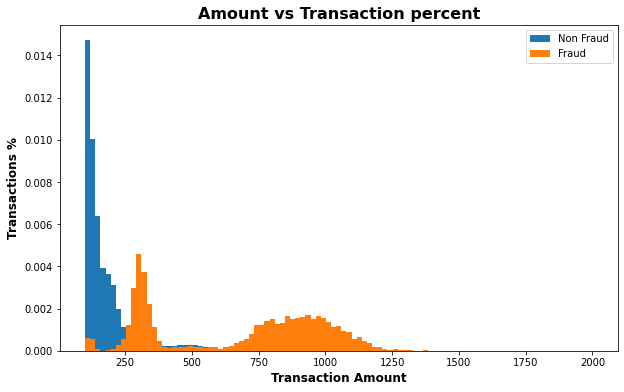

In [41]:
# Plotting percentage of transaction for amount
plt.figure(figsize=(10,6))

bins = np.linspace(100, 2000, 100)
plt.hist(df1_no['amt'], bins,alpha=1, density=True, label='Non Fraud' )
plt.hist(df1_yes['amt'], bins,alpha=1, density=True, label='Fraud')

plt.title('Amount vs Transaction percent',fontweight='bold', size=16)

plt.xlabel('Transaction Amount',fontweight='bold', size=12)
plt.ylabel('Transactions %', fontweight='bold', size=12)
plt.legend()
plt.show()

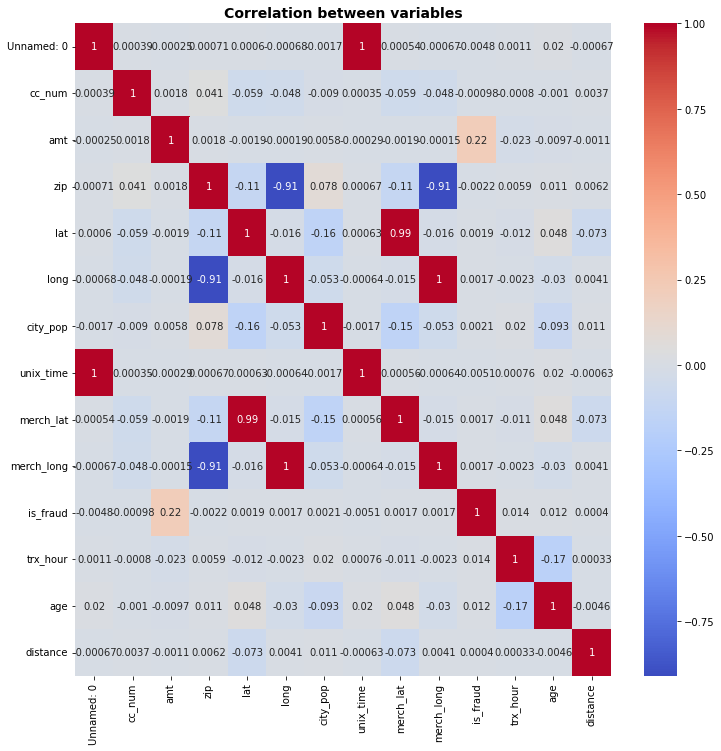

In [42]:
# Plotting correlation of the dataframe
plt.figure(figsize=(12,12))
sns.heatmap(df1.corr(), cmap="coolwarm", annot=True)
plt.title('Correlation between variables',fontweight='bold', size=14)
plt.show()

**Observation:**
- Strong correlation is observed between 
  - latitude and merchant latitude 
  - longitude and merchant longitude.
- Weak correlation is observed between
  - credit card number and other features

### **Data Preparation**

In [43]:
# Creating a copy of df1 to prepare data for modelling
df2 = df1.copy()

**Dropping columns that are not useful:**

1. 'Unnamed: 0' - unique index column 
2. 'trans_date_trans_time' - date and time of the transaction
3. 'cc_num' - credit card number of the customer
4. 'merchant' - merchant name for transaction
5. 'first' and 'last' - first and last names of credit card users 
6. 'street', 'city', 'state' and 'zip' - address of the customer
7. 'lat' and 'long' - customer location coordinates
8. 'city_pop' - population of city, 'region' column is derived from it
9. 'job' - job of customer
10. 'dob' - date of birth of customer
11. 'trans_num' - unique number generated for each transaction
12. 'unix_time' - transaction time generated in unix
13. 'merch_lat' and 'merch_long' - merchant location coordinates
14. 'trx_period' - month and year of the transaction


In [44]:
# Dropping irrelevant columns from the dataframe
df2 = df2.drop(['Unnamed: 0','trans_date_trans_time','cc_num','merchant',
                'first','last','street','city','state','zip','lat','long','city_pop','job','dob',
                'trans_num','unix_time','merch_lat','merch_long','trx_period'],axis=1)

In [45]:
# Checking the updated dataframe information
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1296675 entries, 0 to 1296674
Data columns (total 9 columns):
 #   Column    Non-Null Count    Dtype   
---  ------    --------------    -----   
 0   category  1296675 non-null  object  
 1   amt       1296675 non-null  float64 
 2   gender    1296675 non-null  object  
 3   is_fraud  1296675 non-null  int64   
 4   trx_hour  1296675 non-null  int64   
 5   trx_day   1296675 non-null  object  
 6   age       1296675 non-null  float64 
 7   region    1296675 non-null  category
 8   distance  1296675 non-null  float64 
dtypes: category(1), float64(3), int64(2), object(3)
memory usage: 80.4+ MB


In [46]:
# One-hot encoding for categorical variables
var1 = pd.get_dummies(df2[['category', 'gender', 'trx_day', 'region']], drop_first= True)
df2 = pd.concat([df2, var1], axis=1)

In [47]:
# Dropping the repeated variables
df2 = df2.drop(['category', 'gender', 'trx_day','region'],1)

In [48]:
# Scaling the column values
from sklearn.preprocessing import RobustScaler
col_list = [x for x in df2.columns if df2[x].max()>1]
scaler = RobustScaler()
scaled_col = scaler.fit_transform(df2[col_list])
scaled_col = pd.DataFrame(scaled_col, columns=col_list)
for c in scaled_col:
    df2[c] = scaled_col[c]

In [49]:
# Displaying the updated dataframe
df2.head(2)

,amt,is_fraud,trx_hour,age,distance,category_food_dining,category_gas_transport,category_grocery_net,category_grocery_pos,category_health_fitness,category_home,category_kids_pets,category_misc_net,category_misc_pos,category_personal_care,category_shopping_net,category_shopping_pos,category_travel,gender_M,trx_day_Monday,trx_day_Saturday,trx_day_Sunday,trx_day_Thursday,trx_day_Tuesday,trx_day_Wednesday,region_semi-urban,region_urban
0,-0.578990,0,-1.166667,-0.541667,0.008474,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0
1,0.812491,0,-1.166667,-0.125000,-1.112379,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0


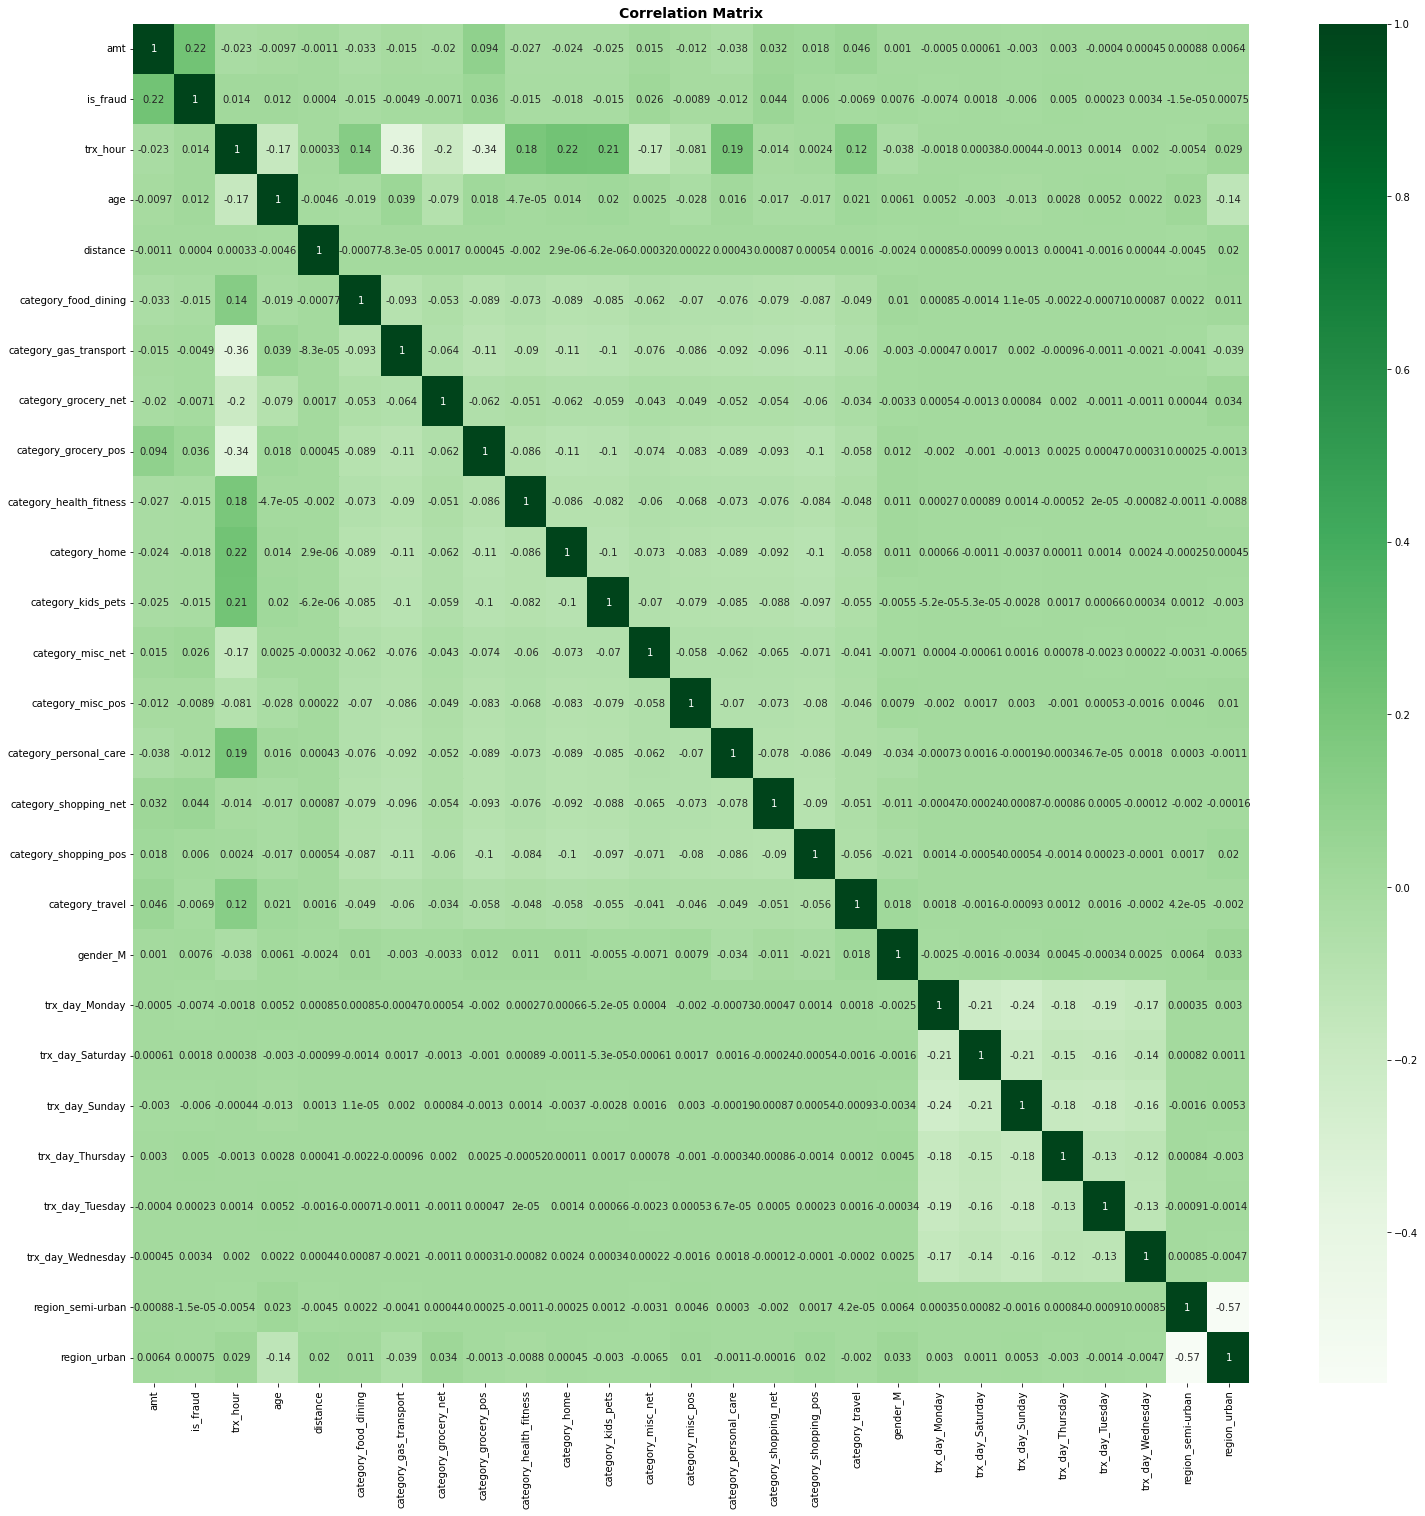

In [50]:
# Plotting correlation of the updated dataframe
plt.figure(figsize= (25, 25))
sns.heatmap(df2.corr(), annot=True, cmap= 'Greens')
plt.title('Correlation Matrix',fontweight='bold', size=14)
plt.show()

**Observation:**
- No strong correlation is observed between the variables.

## **3. Train/Test Data Splitting**

In [51]:
# Separating the target variable
X = df2.drop(['is_fraud'],axis=1) 
y = df2['is_fraud'] 

In [52]:
# Splitting the dataset into train and test set for modelling and validation
from sklearn import model_selection
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, stratify=y, random_state=0)

In [53]:
print('Total count:\t',np.sum(y),'\nTrain count:\t',np.sum(y_train),'\nTest count:\t',np.sum(y_test))

Total count:	 7506 
Train count:	 5629 
Test count:	 1877


In [54]:
# Resampling using SMOTE to handle class imbalance
from imblearn.over_sampling import SMOTE
smt = SMOTE(random_state=0)
X_train_smt, y_train_smt = smt.fit_resample(X_train, y_train.ravel())

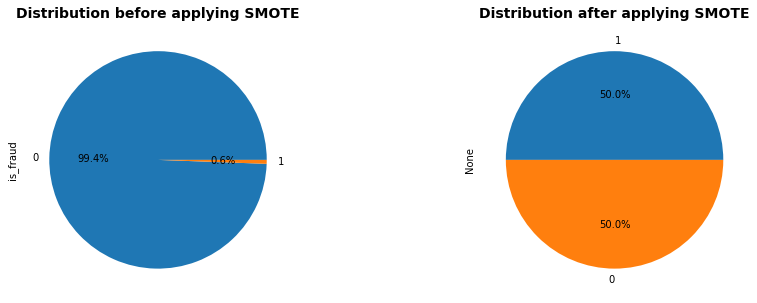

In [55]:
# Visualizing the effect of SMOTE over imbalanced dataset
import matplotlib.ticker as mtick
fig, (ax1, ax2) = plt.subplots(ncols = 2, figsize =(15, 5))
ax1.set_title('Distribution before applying SMOTE',fontweight='bold', size=14)
pd.Series(y_train).value_counts().plot.pie(autopct='%.1f%%',ax=ax1)
ax1.yaxis.set_major_formatter(mtick.PercentFormatter())
ax2.set_title('Distribution after applying SMOTE',fontweight='bold', size=14)  
pd.Series(y_train_smt).value_counts().plot.pie(autopct='%.1f%%',ax=ax2)
ax2.yaxis.set_major_formatter(mtick.PercentFormatter())
plt.show()

## **4. Model Building or Hyperparameter Tuning**

In [56]:
# Importing necessary libraries for Modelling
import statsmodels.api as sm
from sklearn.linear_model import LogisticRegression 
from sklearn.feature_selection import RFE
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn import metrics
from sklearn.metrics import precision_score, recall_score, confusion_matrix, classification_report, accuracy_score, f1_score

### **Logistic Regression**

In [57]:
# Logistic Regression model
lr_base = sm.GLM(y_train_smt,(sm.add_constant(X_train_smt)), family=sm.families.Binomial())
lr_base.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                      y   No. Observations:              1933754
Model:                            GLM   Df Residuals:                  1933727
Model Family:                Binomial   Df Model:                           26
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                    nan
Date:                Mon, 27 Dec 2021   Deviance:                          inf
Time:                        03:44:12   Pearson chi2:                 4.66e+17
No. Iterations:                     2                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                      -0.8360      0.009    -92.529      0.000      -0.854      -0.818
amt                         0.5282      0.001    768.717      0.000       0.527       0.530
trx_hour                    0.4655      0.004    121.637      0.000       0.458       0.473
age                        -0.0112      0.003     -4.394      0.000      -0.016      -0.006
distance                    0.0245      0.003      8.558      0.000       0.019       0.030
category_food_dining        0.3100      0.011     27.584      0.000       0.288       0.332
category_gas_transport      2.1585      0.010    223.323      0.000       2.140       2.177
category_grocery_net        1.4578      0.013    111.190      0.000       1.432       1.484
category_grocery_pos        1.8422      0.009    202.248      0.000       1.824       1.860
category_health_fitness     0.3098      0.012     26.409      0.000       0.287       0.333
category_home              -0.0704      0.010     -6.754      0.000      -0.091      -0.050
category_kids_pets          0.6573      0.010     63.944      0.000       0.637       0.677
category_misc_net          -0.5274      0.011    -48.556      0.000      -0.549      -0.506
category_misc_pos           0.9967      0.011     91.596      0.000       0.975       1.018
category_personal_care      0.7802      0.011     73.422      0.000       0.759       0.801
category_shopping_net      -1.6183      0.011   -150.810      0.000      -1.639      -1.597
category_shopping_pos      -1.2048      0.010   -115.507      0.000      -1.225      -1.184
category_travel             0.9366      0.013     69.978      0.000       0.910       0.963
gender_M                   -0.3286      0.004    -87.555      0.000      -0.336      -0.321
trx_day_Monday             -1.0923      0.006   -175.139      0.000      -1.105      -1.080
trx_day_Saturday           -0.7927      0.006   -125.454      0.000      -0.805      -0.780
trx_day_Sunday             -1.0923      0.006   -175.812      0.000      -1.104      -1.080
trx_day_Thursday           -0.8172      0.007   -118.630      0.000      -0.831      -0.804
trx_day_Tuesday            -1.0040      0.007   -144.267      0.000      -1.018      -0.990
trx_day_Wednesday          -0.8235      0.007   -114.358      0.000      -0.838      -0.809
region_semi-urban          -0.2024      0.004    -46.529      0.000      -0.211      -0.194
region_urban               -0.3012      0.005    -58.284      0.000      -0.311      -0.291
===========================================================================================
"""

**Observation**
- All variables have low p-values, making them significant.

#### **Feature Selection using RFE**

In [58]:
lr = LogisticRegression()

In [59]:
# Running RFE with 15 variables as output
rfe = RFE(lr, step=15)
rfe = rfe.fit(X_train_smt, y_train_smt)

In [60]:
lr.fit(X_train_smt, y_train_smt)

LogisticRegression()

In [61]:
# List of features and their ranking 
list(zip(X_train_smt.columns, rfe.support_, rfe.ranking_))

[('amt', False, 2),
 ('trx_hour', False, 2),
 ('age', False, 2),
 ('distance', False, 2),
 ('category_food_dining', False, 2),
 ('category_gas_transport', True, 1),
 ('category_grocery_net', True, 1),
 ('category_grocery_pos', True, 1),
 ('category_health_fitness', False, 2),
 ('category_home', False, 2),
 ('category_kids_pets', True, 1),
 ('category_misc_net', True, 1),
 ('category_misc_pos', True, 1),
 ('category_personal_care', True, 1),
 ('category_shopping_net', True, 1),
 ('category_shopping_pos', True, 1),
 ('category_travel', True, 1),
 ('gender_M', False, 2),
 ('trx_day_Monday', True, 1),
 ('trx_day_Saturday', False, 2),
 ('trx_day_Sunday', True, 1),
 ('trx_day_Thursday', False, 2),
 ('trx_day_Tuesday', True, 1),
 ('trx_day_Wednesday', False, 2),
 ('region_semi-urban', False, 2),
 ('region_urban', False, 2)]

In [62]:
# Extracting all the columns selected by rfe as best variable 
col = X_train_smt.columns[rfe.support_]

In [63]:
# Removing those with less important features
X_train_smt.columns[~rfe.support_]

Index(['amt', 'trx_hour', 'age', 'distance', 'category_food_dining', 'category_health_fitness', 'category_home', 'gender_M', 'trx_day_Saturday', 'trx_day_Thursday', 'trx_day_Wednesday', 'region_semi-urban', 'region_urban'], dtype='object')

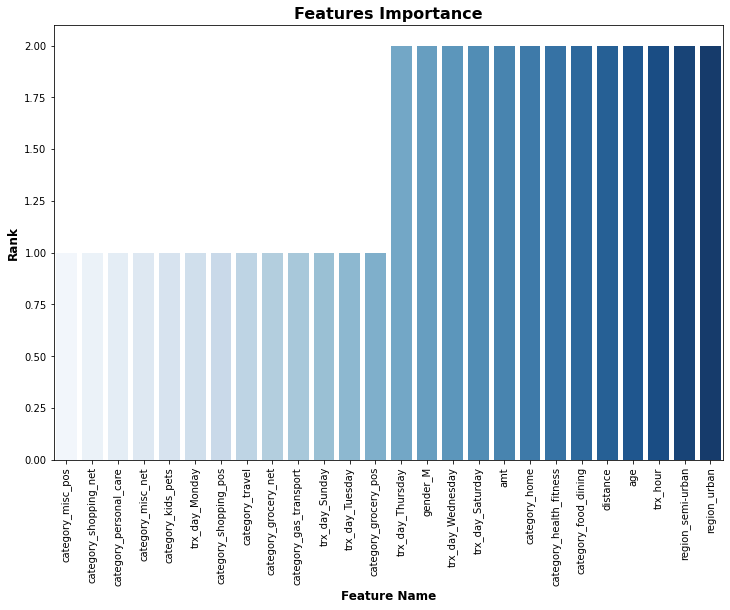

In [64]:
# Important featues
feature_imp = pd.DataFrame(list(zip(X_train_smt.columns, rfe.support_, rfe.ranking_)), columns=['variables','selected','rank'])
feature_imp = feature_imp.set_index('variables')

plt.figure(figsize=[12,8])
plt.title('Features Importance',fontweight='bold', size=16)
sns.barplot( x=feature_imp.index.values, y='rank',data=feature_imp, 
            order=feature_imp.sort_values(by='rank').index.values, palette='Blues', )
plt.xticks(rotation=90)
plt.xlabel('Feature Name',fontweight='bold', size=12);
plt.ylabel('Rank',fontweight='bold', size=12);

#### **Assessing the model with statsmodel**

In [65]:
# Assessing Logistic Regression model
X_train_sm = sm.add_constant(X_train_smt[col])
lr_m = sm.GLM(y_train_smt, X_train_sm, family=sm.families.Binomial())
res = lr_m.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                      y   No. Observations:              1933754
Model:                            GLM   Df Residuals:                  1933740
Model Family:                Binomial   Df Model:                           13
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:            -1.1609e+06
Date:                Mon, 27 Dec 2021   Deviance:                   2.3218e+06
Time:                        03:45:31   Pearson chi2:                 1.93e+06
No. Iterations:                     5                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                     -0.7372      0.004   -194.363      0.000      -0.745      -0.730
category_gas_transport     0.7598      0.006    126.266      0.000       0.748       0.772
category_grocery_net       0.1452      0.011     13.726      0.000       0.125       0.166
category_grocery_pos       1.8963      0.005    355.695      0.000       1.886       1.907
category_kids_pets        -0.0665      0.008     -8.648      0.000      -0.082      -0.051
category_misc_net          1.8827      0.007    286.012      0.000       1.870       1.896
category_misc_pos          0.3461      0.008     43.937      0.000       0.331       0.362
category_personal_care     0.0365      0.008      4.506      0.000       0.021       0.052
category_shopping_net      2.1214      0.006    378.198      0.000       2.110       2.132
category_shopping_pos      1.1450      0.006    195.131      0.000       1.134       1.157
category_travel            0.2913      0.011     27.193      0.000       0.270       0.312
trx_day_Monday            -0.6230      0.004   -139.633      0.000      -0.632      -0.614
trx_day_Sunday            -0.5769      0.004   -130.598      0.000      -0.586      -0.568
trx_day_Tuesday           -0.4671      0.005    -89.740      0.000      -0.477      -0.457
==========================================================================================
"""

In [66]:
# Getting the predicted values on the train set
y_train_pred = res.predict(X_train_sm)
y_train_pred = y_train_pred.values.reshape(-1)

In [67]:
# Calculating the probability for fraud
y_train_pred_final = pd.DataFrame({'Fraud':y_train_smt, 'Fraud_Prob': y_train_pred})
y_train_pred_final.head()

,Fraud,Fraud_Prob
0,0,0.761180
1,0,0.204207
2,0,0.323625
3,0,0.211815
4,0,0.230719


In [68]:
# Creating column 'Predicted' with 1 if Fraud_prob > 0.5 else 0
y_train_pred_final['Predicted'] = y_train_pred_final.Fraud_Prob.map(lambda x: 1 if x > 0.5 else 0)
y_train_pred_final.head(10)

,Fraud,Fraud_Prob,Predicted
0,0,0.761180,1
1,0,0.204207,0
2,0,0.323625,0
3,0,0.211815,0
4,0,0.230719,0
5,0,0.457855,0
6,0,0.323625,0
7,0,0.761180,1
8,0,0.257498,0
9,0,0.761180,1


In [69]:
print('Evaluation metrics for Logistic Regression Model on train set')
print ('\nAccuracy: ', accuracy_score(y_train_pred_final.Fraud,y_train_pred_final.Predicted))
print ('\nConfusion matrix:\n',confusion_matrix(y_train_pred_final.Fraud,y_train_pred_final.Predicted))
print ('\nClasification report:\n', classification_report(y_train_pred_final.Fraud,y_train_pred_final.Predicted))

Evaluation metrics for Logistic Regression Model on train set

Accuracy:  0.6930266207594141

Confusion matrix:
 [[667193 299684]
 [293927 672950]]

Clasification report:
               precision    recall  f1-score   support

           0       0.69      0.69      0.69    966877
           1       0.69      0.70      0.69    966877

    accuracy                           0.69   1933754
   macro avg       0.69      0.69      0.69   1933754
weighted avg       0.69      0.69      0.69   1933754



In [70]:
from sklearn.metrics import plot_roc_curve

In [71]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False)
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [72]:
fpr, tpr, thresholds = metrics.roc_curve(y_train_pred_final.Fraud, y_train_pred_final.Predicted, drop_intermediate = False)

ROC curve for Logistic Regression Model on train set


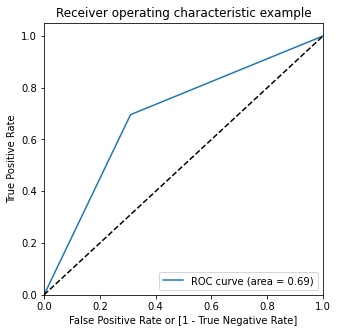

In [73]:
print('ROC curve for Logistic Regression Model on train set')
draw_roc(y_train_pred_final.Fraud, y_train_pred_final.Predicted)

In [74]:
y_test_pred_lr = lr.predict(X_test)

In [75]:
print('Evaluation metrics for Logistic Regression Model on test set for validation')
print ('\nAccuracy: ', accuracy_score(y_test,y_test_pred_lr))
print ('\nConfusion matrix:\n',confusion_matrix(y_test,y_test_pred_lr))
print ('\nClasification report:\n', classification_report(y_test,y_test_pred_lr))

Evaluation metrics for Logistic Regression Model on test set for validation

Accuracy:  0.8881786969142639

Confusion matrix:
 [[286487  35805]
 [   444   1433]]

Clasification report:
               precision    recall  f1-score   support

           0       1.00      0.89      0.94    322292
           1       0.04      0.76      0.07      1877

    accuracy                           0.89    324169
   macro avg       0.52      0.83      0.51    324169
weighted avg       0.99      0.89      0.94    324169



ROC curve for Logistic Regression Model on test set for validation


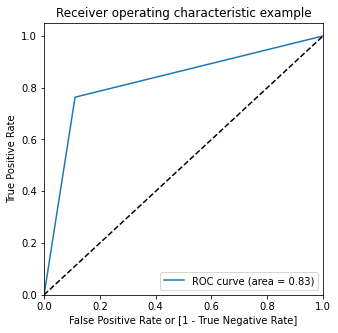

In [76]:
print('ROC curve for Logistic Regression Model on test set for validation')
draw_roc(y_test,y_test_pred_lr)

**Observation:**

Validation results for Logistic Regression model
- Recall score = 0.76
- AUC score = 0.83

### **Decision Tree**

In [77]:
# Decision Tree model
dt = DecisionTreeClassifier(criterion = 'gini', random_state=42)

In [78]:
params = {
    "max_depth": [10,20],
    "min_samples_leaf": [50]
}

#### **Hyperparameter Tuning**

In [79]:
grid_search = GridSearchCV(estimator=dt,
                           param_grid=params,
                           cv=3,
                           n_jobs=-1, verbose=1, scoring="recall")

In [80]:
grid_search.fit(X_train_smt, y_train_smt)

Fitting 3 folds for each of 2 candidates, totalling 6 fits


GridSearchCV(cv=3, estimator=DecisionTreeClassifier(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [10, 20], 'min_samples_leaf': [50]},
             scoring='recall', verbose=1)

In [81]:
grid_search.best_score_

0.9917290405937292

In [82]:
dt_best = grid_search.best_estimator_
dt_best

DecisionTreeClassifier(max_depth=20, min_samples_leaf=50, random_state=42)

In [83]:
y_train_pred = dt_best.predict(X_train_smt)

In [84]:
dt_best.feature_importances_

array([7.03457888e-01, 9.73355656e-02, 2.40786047e-02, 4.19760633e-03,
       9.72355844e-03, 7.68159502e-02, 2.08695133e-02, 3.92603195e-03,
       1.03373819e-03, 9.81076653e-03, 3.91315858e-03, 1.86003439e-03,
       1.51489681e-02, 4.71925817e-03, 2.90937619e-03, 2.28159515e-03,
       1.14348503e-02, 2.09455637e-03, 3.85118513e-04, 3.95038138e-04,
       5.96645146e-04, 3.17195043e-04, 4.89861496e-04, 2.95047398e-04,
       7.50175174e-04, 1.15989860e-03])

In [85]:
dt_imp_df = pd.DataFrame({
    "Varname": X_train_smt.columns,
    "DT_Imp": dt_best.feature_importances_
})

In [86]:
# Important features
dt_imp_df.sort_values(by="DT_Imp", ascending=False)

,Varname,DT_Imp
0,amt,0.703458
1,trx_hour,0.097336
5,category_gas_transport,0.076816
2,age,0.024079
6,category_grocery_net,0.020870
12,category_misc_pos,0.015149
16,category_travel,0.011435
9,category_home,0.009811
4,category_food_dining,0.009724
13,category_personal_care,0.004719


In [87]:
print('Evaluation metrics for Decision Tree Model on train set')
print ('\nAccuracy: ', accuracy_score(y_train_smt,y_train_pred))
print ('\nConfusion matrix:\n',confusion_matrix(y_train_smt,y_train_pred))
print ('\nClasification report:\n', classification_report(y_train_smt,y_train_pred))

Evaluation metrics for Decision Tree Model on train set

Accuracy:  0.9923552840743962

Confusion matrix:
 [[958028   8849]
 [  5934 960943]]

Clasification report:
               precision    recall  f1-score   support

           0       0.99      0.99      0.99    966877
           1       0.99      0.99      0.99    966877

    accuracy                           0.99   1933754
   macro avg       0.99      0.99      0.99   1933754
weighted avg       0.99      0.99      0.99   1933754



ROC curve for Decision Tree Model on train set


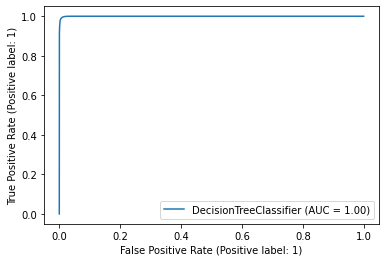

In [88]:
print('ROC curve for Decision Tree Model on train set')
plot_roc_curve(dt_best, X_train_smt, y_train_smt)
plt.show()

In [89]:
y_test_pred_dt = dt_best.predict(X_test)

In [90]:
print('Evaluation metrics for Decision Tree Model on test set for validation')
print ('\nAccuracy: ', accuracy_score(y_test,y_test_pred_dt))
print ('\nConfusion matrix:\n',confusion_matrix(y_test,y_test_pred_dt))
print ('\nClasification report:\n', classification_report(y_test,y_test_pred_dt))

Evaluation metrics for Decision Tree Model on test set for validation

Accuracy:  0.9898201246880485

Confusion matrix:
 [[319117   3175]
 [   125   1752]]

Clasification report:
               precision    recall  f1-score   support

           0       1.00      0.99      0.99    322292
           1       0.36      0.93      0.51      1877

    accuracy                           0.99    324169
   macro avg       0.68      0.96      0.75    324169
weighted avg       1.00      0.99      0.99    324169



ROC curve for Decision Tree Model on test set for validation


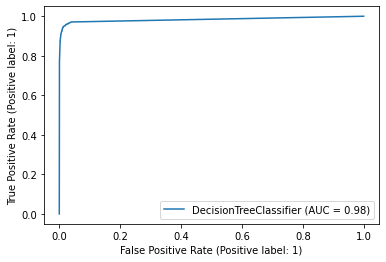

In [91]:
print('ROC curve for Decision Tree Model on test set for validation')
plot_roc_curve(dt_best, X_test, y_test)
plt.show()

**Observation:**

Validation results for Decision Tree model
- Recall score = 0.93
- AUC score = 0.98

### **Random Forest**

In [92]:
# Random Forest model
rf = RandomForestClassifier(random_state=42, n_jobs=-1)

In [93]:
params = {
    'max_depth': [10,20],
    'n_estimators': [50]
}

#### **Hyperparameter Tuning**

In [94]:
grid_search = GridSearchCV(estimator=rf,
                           param_grid=params,
                           cv = 3,
                           n_jobs=-1, verbose=1, scoring="recall")

In [95]:
grid_search.fit(X_train_smt, y_train_smt)

Fitting 3 folds for each of 2 candidates, totalling 6 fits


GridSearchCV(cv=3, estimator=RandomForestClassifier(n_jobs=-1, random_state=42),
             n_jobs=-1,
             param_grid={'max_depth': [10, 20], 'n_estimators': [50]},
             scoring='recall', verbose=1)

In [96]:
grid_search.best_score_

0.9960791286087026

In [97]:
rf_best = grid_search.best_estimator_
rf_best

RandomForestClassifier(max_depth=20, n_estimators=50, n_jobs=-1,
                       random_state=42)

In [98]:
y_train_pred = rf_best.predict(X_train_smt)

In [99]:
rf_best.feature_importances_

array([0.56428803, 0.21649738, 0.02756124, 0.01032045, 0.00954791,
       0.02913075, 0.00608986, 0.02617773, 0.00647537, 0.01035596,
       0.0069951 , 0.01010467, 0.0070351 , 0.00459224, 0.02241616,
       0.00994348, 0.00724726, 0.00887161, 0.00239179, 0.00154051,
       0.00239799, 0.00130956, 0.00149828, 0.00121782, 0.0024817 ,
       0.00351202])

In [100]:
rf_imp_df = pd.DataFrame({
    "Varname": X_train_smt.columns,
    "RF_Imp": rf_best.feature_importances_
})

In [101]:
# Important features
rf_imp_df.sort_values(by="RF_Imp", ascending=False)

,Varname,RF_Imp
0,amt,0.564288
1,trx_hour,0.216497
5,category_gas_transport,0.029131
2,age,0.027561
7,category_grocery_pos,0.026178
14,category_shopping_net,0.022416
9,category_home,0.010356
3,distance,0.010320
11,category_misc_net,0.010105
15,category_shopping_pos,0.009943


In [102]:
print('Evaluation metrics for Random Forest Model on train set')
print ('\nAccuracy: ', accuracy_score(y_train_smt, y_train_pred))
print ('\nConfusion matrix:\n',confusion_matrix(y_train_smt, y_train_pred))
print ('\nClasification report:\n', classification_report(y_train_smt, y_train_pred))

Evaluation metrics for Random Forest Model on train set

Accuracy:  0.9969877243951403

Confusion matrix:
 [[964040   2837]
 [  2988 963889]]

Clasification report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    966877
           1       1.00      1.00      1.00    966877

    accuracy                           1.00   1933754
   macro avg       1.00      1.00      1.00   1933754
weighted avg       1.00      1.00      1.00   1933754



ROC curve for Random Forest Model on train set


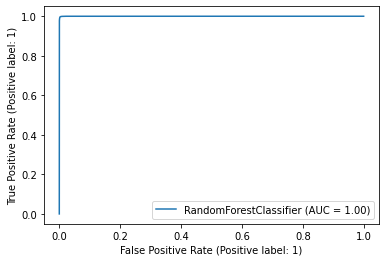

In [103]:
print('ROC curve for Random Forest Model on train set')
plot_roc_curve(rf_best, X_train_smt, y_train_smt)
plt.show()

In [104]:
y_test_pred_rf = rf_best.predict(X_test)

In [105]:
print('Evaluation metrics for Random Forest Model on test set for validation')
print ('\nAccuracy: ', accuracy_score(y_test, y_test_pred_rf))
print ('\nConfusion matrix:\n',confusion_matrix(y_test, y_test_pred_rf))
print ('\nClasification report:\n', classification_report(y_test, y_test_pred_rf))

Evaluation metrics for Random Forest Model on test set for validation

Accuracy:  0.9955455333483461

Confusion matrix:
 [[321046   1246]
 [   198   1679]]

Clasification report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    322292
           1       0.57      0.89      0.70      1877

    accuracy                           1.00    324169
   macro avg       0.79      0.95      0.85    324169
weighted avg       1.00      1.00      1.00    324169



ROC curve for Random Forest Model on test set for validation


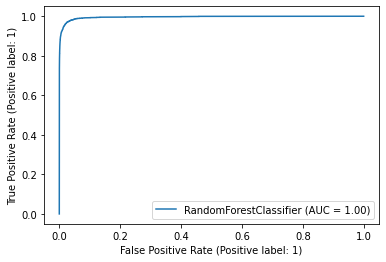

In [106]:
print('ROC curve for Random Forest Model on test set for validation')
plot_roc_curve(rf_best, X_test, y_test)
plt.show()

**Observation:**

Validation results for Random Forest model
- Recall score = 0.89
- AUC score = 1.00

### **Gradient Boosting (XG Boost)**

In [107]:
# Gradient Boosting Model
xgb = XGBClassifier(random_state=42)

In [108]:
params = {
    "n_estimators": [50,100],
    "learning_rate": [0.1],
    "max_depth": [3]
}

#### **Hyperparameter Tuning**

In [109]:
grid_search = GridSearchCV(estimator=xgb,
                           param_grid=params,
                           cv = 3,
                           n_jobs=-1, verbose=1, scoring="recall")

In [110]:
grid_search.fit(X_train_smt, y_train_smt)

Fitting 3 folds for each of 2 candidates, totalling 6 fits


GridSearchCV(cv=3, estimator=XGBClassifier(random_state=42), n_jobs=-1,
             param_grid={'learning_rate': [0.1], 'max_depth': [3],
                         'n_estimators': [50, 100]},
             scoring='recall', verbose=1)

In [111]:
grid_search.best_score_

0.9643512046206482

In [112]:
xgb_best = grid_search.best_estimator_
xgb_best

XGBClassifier(random_state=42)

In [113]:
y_train_pred = xgb_best.predict(X_train_smt)

In [114]:
xgb_best.feature_importances_

array([0.22085467, 0.09024204, 0.00597038, 0.00667469, 0.06099112,
       0.21448591, 0.01784793, 0.06473518, 0.0048345 , 0.02824687,
       0.00754963, 0.03846906, 0.01791411, 0.00253378, 0.06730898,
       0.03963121, 0.03111284, 0.01729706, 0.0127216 , 0.01102529,
       0.01011421, 0.00059523, 0.01117854, 0.        , 0.01029981,
       0.00736546], dtype=float32)

In [115]:
xgb_imp_df = pd.DataFrame({
    "Varname": X_train_smt.columns,
    "XGB_Imp": xgb_best.feature_importances_
})

In [116]:
# Important features
xgb_imp_df.sort_values(by="XGB_Imp", ascending=False)

,Varname,XGB_Imp
0,amt,0.220855
5,category_gas_transport,0.214486
1,trx_hour,0.090242
14,category_shopping_net,0.067309
7,category_grocery_pos,0.064735
4,category_food_dining,0.060991
15,category_shopping_pos,0.039631
11,category_misc_net,0.038469
16,category_travel,0.031113
9,category_home,0.028247


In [117]:
print('Evaluation metrics for XG Boost Model on train set')
print ('\nAccuracy: ', accuracy_score(y_train_smt, y_train_pred))
print ('\nConfusion matrix:\n',confusion_matrix(y_train_smt, y_train_pred))
print ('\nClasification report:\n', classification_report(y_train_smt, y_train_pred))

Evaluation metrics for XG Boost Model on train set

Accuracy:  0.9685461542678128

Confusion matrix:
 [[941444  25433]
 [ 35391 931486]]

Clasification report:
               precision    recall  f1-score   support

           0       0.96      0.97      0.97    966877
           1       0.97      0.96      0.97    966877

    accuracy                           0.97   1933754
   macro avg       0.97      0.97      0.97   1933754
weighted avg       0.97      0.97      0.97   1933754



ROC curve for XG Boost Model on train set


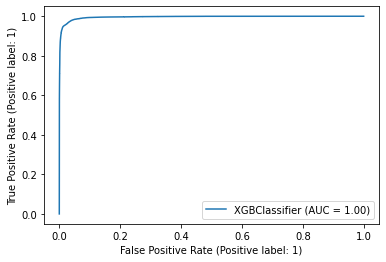

In [118]:
print('ROC curve for XG Boost Model on train set')
plot_roc_curve(xgb_best, X_train_smt, y_train_smt)
plt.show()

In [119]:
y_test_pred_xg = xgb_best.predict(X_test)

In [120]:
print('Evaluation metrics for XG Boost Model on test set for validation')
print ('\nAccuracy: ', accuracy_score(y_test, y_test_pred_xg))
print ('\nConfusion matrix:\n',confusion_matrix(y_test, y_test_pred_xg))
print ('\nClasification report:\n', classification_report(y_test, y_test_pred_xg))

Evaluation metrics for XG Boost Model on test set for validation

Accuracy:  0.9735384938103273

Confusion matrix:
 [[313817   8475]
 [   103   1774]]

Clasification report:
               precision    recall  f1-score   support

           0       1.00      0.97      0.99    322292
           1       0.17      0.95      0.29      1877

    accuracy                           0.97    324169
   macro avg       0.59      0.96      0.64    324169
weighted avg       0.99      0.97      0.98    324169



ROC curve for XG Boost Model on test set for validation


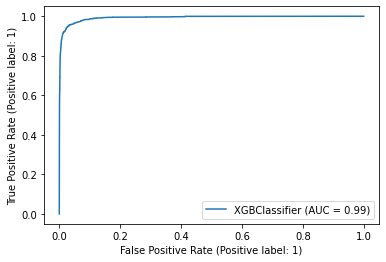

In [121]:
print('ROC curve for XG Boost Model on test set for validation')
plot_roc_curve(xgb_best, X_test, y_test)
plt.show()

**Observation:**

Validation results for XG Boost model
- Recall score = 0.95
- AUC score = 0.99

### **Final Model Selection**

In [122]:
print ('\nLogistic Regression Recall Score: ', round(recall_score(y_test, y_test_pred_lr),2))
print ('\nDecision Tree Recall Score: ', round(recall_score(y_test, y_test_pred_dt),2))
print ('\nRandom Forest Recall Score: ', round(recall_score(y_test, y_test_pred_rf),2))
print ('\nGradient Boosting Recall Score: ', round(recall_score(y_test, y_test_pred_xg),2))


Logistic Regression Recall Score:  0.76

Decision Tree Recall Score:  0.93

Random Forest Recall Score:  0.89

Gradient Boosting Recall Score:  0.95


**Observation:**

The Recall Score of XG Boost model is the highest and is in the same range for both its training and validation datasets. Hence, it can be considered a better performing model for identifying the fraudulent transactions.

### **Important Predictors**

In [123]:
# Important predictors
xgb_imp_df.sort_values(by="XGB_Imp", ascending=False).head()

,Varname,XGB_Imp
0,amt,0.220855
5,category_gas_transport,0.214486
1,trx_hour,0.090242
14,category_shopping_net,0.067309
7,category_grocery_pos,0.064735


**Observation:**

The top three important predictors as per the model are-
1. Transaction Amount ('amt')
2. Category ('category_gas_transport')
3. Hour of Transaction ('trx_hour')

## **5. Model Evaluation**

#### *Note: The Test dataset is being used for final model evaluation.*

### **Test Data Preparation**

In [124]:
# Creating copy of test dataframe
df1_fT = df_fraudTest.copy()

In [125]:
# Converting datatype to datetime
df1_fT['trans_date_trans_time'] = pd.to_datetime(df1_fT['trans_date_trans_time'])
df1_fT['dob'] = pd.to_datetime(df1_fT['dob'])

In [126]:
# Deriving hour of transaction (trx_hour) 
df1_fT['trx_hour'] = df1_fT['trans_date_trans_time'].dt.hour

# Deriving day of transaction (trx_day) 
df1_fT['trx_day'] = df1_fT['trans_date_trans_time'].dt.day_name()

# Deriving year & month of transaction (trx_period) 
df1_fT['trx_period'] = df1_fT['trans_date_trans_time'].dt.to_period('M')

# Deriving age of customer during transaction 
df1_fT['age'] = (np.round((df1_fT['trans_date_trans_time'] - df1_fT['dob'])/np.timedelta64(1,'Y')))

# Creating a column to identify the region type based on city population (<25%: rural, 25-50%: semi-urban, >50%: urban)
df1_fT['region'] = pd.qcut(df1_fT.city_pop, q=[0, .25, .75, 1], labels=['rural', 'semi-urban', 'urban'])

# Creating the distance column based on longitude and latitude
df1_fT['distance'] = fn_dist(df1_fT['long'],df1_fT['lat'],df1_fT['merch_long'],df1_fT['merch_lat'])

In [127]:
# Creating copy of df1_fT
df2_fT = df1_fT.copy()

In [128]:
# Dropping irrelevant columns from the dataframe
df2_fT = df2_fT.drop(['Unnamed: 0','trans_date_trans_time','cc_num','merchant',
                      'first','last','street','city','state','zip','lat','long','city_pop','job','dob',
                      'trans_num','unix_time','merch_lat','merch_long','trx_period'],axis=1)

In [129]:
df2_fT.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 555719 entries, 0 to 555718
Data columns (total 9 columns):
 #   Column    Non-Null Count   Dtype   
---  ------    --------------   -----   
 0   category  555719 non-null  object  
 1   amt       555719 non-null  float64 
 2   gender    555719 non-null  object  
 3   is_fraud  555719 non-null  int64   
 4   trx_hour  555719 non-null  int64   
 5   trx_day   555719 non-null  object  
 6   age       555719 non-null  float64 
 7   region    555719 non-null  category
 8   distance  555719 non-null  float64 
dtypes: category(1), float64(3), int64(2), object(3)
memory usage: 34.4+ MB


In [130]:
# One-hot encoding for categorical variables
var1_fT = pd.get_dummies(df2_fT[['category', 'gender', 'trx_day', 'region']], drop_first= True)
df2_fT = pd.concat([df2_fT, var1_fT], axis=1)

In [131]:
# Dropping the repeated variables
df2_fT = df2_fT.drop(['category', 'gender', 'trx_day','region'],1)

In [132]:
# Scaling the column values
col_list_fT = [x for x in df2_fT.columns if df2_fT[x].max()>1]
scaler = RobustScaler()
scaled_col = scaler.fit_transform(df2_fT[col_list_fT])
scaled_col = pd.DataFrame(scaled_col, columns=col_list_fT)
for c in scaled_col:
    df2_fT[c] = scaled_col[c]

In [133]:
# Separating the target variable
X_fT = df2_fT.drop(['is_fraud'],axis=1) 
y_fT = df2_fT['is_fraud'] 

In [134]:
# Predicting the target variable on unseen test dataset
y_fT_pred = xgb_best.predict(X_fT)

In [135]:
print('Evaluation metrics for XG Boost Model on the Final test dataset')
print ('\nAccuracy: ', accuracy_score(y_fT, y_fT_pred))
print ('\nConfusion matrix:\n',confusion_matrix(y_fT, y_fT_pred))
print ('\nClasification report:\n', classification_report(y_fT, y_fT_pred))

Evaluation metrics for XG Boost Model on the Final test dataset

Accuracy:  0.972943160122292

Confusion matrix:
 [[538661  14913]
 [   123   2022]]

Clasification report:
               precision    recall  f1-score   support

           0       1.00      0.97      0.99    553574
           1       0.12      0.94      0.21      2145

    accuracy                           0.97    555719
   macro avg       0.56      0.96      0.60    555719
weighted avg       1.00      0.97      0.98    555719



ROC curve for XG Boost Model on the Final test dataset


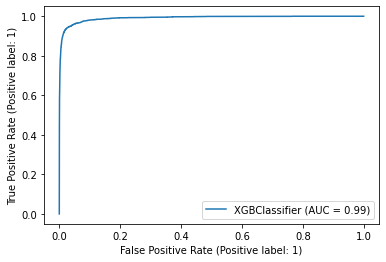

In [136]:
print('ROC curve for XG Boost Model on the Final test dataset')
plot_roc_curve(xgb_best, X_fT, y_fT)
plt.show()

**Observation:**

Final Test Evaluation results for XG Boost model
- Recall score = 0.94
- AUC score = 0.99

The model evaluation results are on par with the best possible model on this data set.

## **6. Business Impact**

#### *Note: The original dataset is used to perform the calculations for Cost Benefit Analysis.*

In [137]:
# Creating original dataset by merging train (df1) and test (df1_fT) dataframes
df_cba = pd.concat([df1,df1_fT])
df_cba.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,state,zip,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud,trx_hour,trx_day,trx_period,age,region,distance
0,0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.970000,Jennifer,Banks,F,561 Perry Cove,Moravian Falls,NC,28654,36.078800,-81.178100,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0,0,Tuesday,2019-01,31.000000,semi-urban,78.548221
1,1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.230000,Stephanie,Gill,F,43039 Riley Greens Suite 393,Orient,WA,99160,48.887800,-118.210500,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0,0,Tuesday,2019-01,41.000000,rural,30.193207
2,2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.110000,Edward,Sanchez,M,594 White Dale Suite 530,Malad City,ID,83252,42.180800,-112.262000,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0,0,Tuesday,2019-01,57.000000,semi-urban,108.138146
3,3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.000000,Jeremy,White,M,9443 Cynthia Court Apt. 038,Boulder,MT,59632,46.230600,-112.113800,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0,0,Tuesday,2019-01,52.000000,semi-urban,95.613163
4,4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.960000,Tyler,Garcia,M,408 Bradley Rest,Doe Hill,VA,24433,38.420700,-79.462900,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0,0,Tuesday,2019-01,33.000000,rural,77.508050


### **Cost-Benefit Analysis**

In [138]:
# Average number of transactions per month
monthly_trx = df_cba.groupby(df_cba['trx_period'])[['trans_num','cc_num']].nunique().reset_index()
monthly_trx.columns = ['Trx_Period','No. of trx','No. of cust']
avg_mon_trx = round(monthly_trx['No. of trx'].mean())
print('Average number of transactions per month:',avg_mon_trx)

Average number of transactions per month: 77183


In [139]:
# Average number of fraudulent transactions per month
df_cba1 = df_cba[df_cba['is_fraud']==1]
monthly_fraud_trx = df_cba1.groupby(df_cba1['trx_period'])[['trans_num','cc_num']].nunique().reset_index()
monthly_fraud_trx.columns = ['Trx_Period','No. of fraud trx','No. of fraud cust']
avg_mon_fraud_trx = round(monthly_fraud_trx['No. of fraud trx'].mean())
print('Average number of fraudulent transactions per month:',avg_mon_fraud_trx)

Average number of fraudulent transactions per month: 402


In [140]:
# Average amount per fraudulent transaction
avg_amt_fraud_trx = round(df_cba1['amt'].mean(),2)
print('Average amount per fraudulent transaction:',avg_amt_fraud_trx)

Average amount per fraudulent transaction: 530.66


In [141]:
# Cost incurred per month before the model was deployed = Average amount per fraudulent transaction * Average number of fraudulent transactions per month
cost_before = round((avg_amt_fraud_trx * avg_mon_fraud_trx),2)
print('Cost incurred per month before the model was deployed:',cost_before)

Cost incurred per month before the model was deployed: 213325.32


In [142]:
final_recall_score = round(recall_score(y_fT, y_fT_pred),2)
print ('\nFinal Recall Score: ', final_recall_score)


Final Recall Score:  0.94


In [143]:
# Average number of transactions per month detected as fraudulent by the model (TF) = Average number of fraudulent transactions per month * Recall metric of final test dataset 
TF = round(avg_mon_fraud_trx * final_recall_score)
print('\nAverage number of transactions per month detected as fraudulent by the model(TF):',TF)
support_cost = round((1.5 * TF),2)
print('\nSupport cost per fraudulent transaction detected by the model:', support_cost)


Average number of transactions per month detected as fraudulent by the model(TF): 378

Support cost per fraudulent transaction detected by the model: 567.0


In [144]:
# Average number of transactions per month that are fraudulent but not detected by the model (FN) = Average number of fraudulent transactions per month * (1-Recall metric of final test dataset)
FN = round(avg_mon_fraud_trx * (1-final_recall_score))
print('\nAverage number of transactions per month that are fraudulent but not detected by the model(FN):',FN)
fraud_cost = round((avg_amt_fraud_trx * FN),2)
print('\nCost incurred due to undetected fraudulent transactions:',fraud_cost)


Average number of transactions per month that are fraudulent but not detected by the model(FN): 24

Cost incurred due to undetected fraudulent transactions: 12735.84


In [145]:
# Cost incurred per month after the model is built and deployed = 1.5*TF + Average amount per fraudulent transaction*FN
cost_after = round((support_cost + fraud_cost),2)
print('\nCost incurred per month after the model was deployed:',cost_after)


Cost incurred per month after the model was deployed: 13302.84


In [146]:
# Final Savings = Cost incurred before - Cost incurred after
final_save = cost_before - cost_after
print('Final savings after the model was deployed:',final_save)

Final savings after the model was deployed: 200022.48


**Observation:**

On performing the Cost-Benefit Analysis with the final recall score of 0.94, it is observed that implementation of the fraud detection model will help the business save upto $200K.

#### *Note: The model deployment cost is not included while gauging the long-term benefits of putting this model into practice.*

# **Recommendations**

Some of the recommendations that can be considered are:

1. The Bank can deploy a fraud detection model and provide a second layer of authentication service for flagged transactions as a permanent solution.
2. In future, they can start issuing cards using chip identification to decrease the possibility of skimming.
3. Customers can be educated to maintain sanity checks of their account by reviewing charges regularly and reporting unauthorized transactions immediately.

However, the most suitable solution is to implement the fraud detection model as this does not affect the customer's time with extra OTP checks on all transactions and is also quite feasible to implement. Building it is a one time procedure and deploying it would be a permanent resolution for the problem of credit card frauds.
